In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import simps
from numpy import trapz
import seaborn as sns
import re
from scipy import stats
%matplotlib inline

In [2]:
# Import excel file as a `pandas.ExcelFile' object (which basically has all sub-sheets in a big container!)
# also, only import 1302 rows
number_of_rows = 2100
data = pd.ExcelFile('../assets/to_combine/2018_12_03_MB231_CTRL_L89A_L89K_KO_L89A_3_um_Ca_free_filtered_data.xlsx', nrows=number_of_rows)

# Find area under the curve

In [7]:
ca_data = data.parse("Sheet1")
#Select just the range of appropriate UTP response
ca_data_UTP = ca_data.loc[40:600]
column_names = ca_data_UTP.columns
print(column_names)
area = pd.DataFrame()
for column_name in column_names:
    temp1 = {column_name: ca_data_UTP[column_name]}
    temp2 = temp1[column_name] -1 #subtract value by 1 to get rid of baseline problem
    y = np.array(temp2)
    area_temp = trapz(y)
    if area_temp > 0: #remove negative area values
        temp3 = pd.DataFrame([column_name],[area_temp])
        area = pd.concat([area, temp3], axis=0)
area = area.reset_index()   
area.columns = ['Area', 'Cell type']

Index(['CTRL1R3', 'CTRL1R15', 'CTRL1R42', 'CTRL1R13', 'CTRL1R30', 'CTRL1R38',
       'CTRL1R43', 'CTRL1R20', 'CTRL1R6', 'CTRL1R21',
       ...
       'L89K6R28', 'L89K6R46', 'L89K6R6', 'L89K6R24', 'L89K6R43', 'L89K6R13',
       'L89K6R5', 'L89K6R54', 'L89K6R48', 'L89K6R35'],
      dtype='object', length=643)


In [4]:
pattern_ctrl = re.compile("CTRL.*")
pattern_l89a = re.compile("L89A.*")
pattern_l89k = re.compile("L89K.*")
pattern_wtoe = re.compile("WTOE.*")
pattern_e120q = re.compile("E120Q.*")
pattern_knot = re.compile("KO.*")

ctrl = pd.DataFrame()
l89 = pd.DataFrame()
cell_name = pd.DataFrame()

for i, row in area.iterrows():
    temp1 =str(row["Cell type"])
    if pattern_ctrl.match(temp1):
        temp2 = pd.DataFrame(['CTRL'])
        cell_name = pd.concat([cell_name, temp2], axis=0)
    if pattern_l89a.match(temp1):
        temp3 = pd.DataFrame(['L89A'])
        cell_name = pd.concat([cell_name, temp3], axis=0, ignore_index=True)
area = pd.concat([area, cell_name], axis=1, ignore_index=True)
area.columns = ['Area', 'Cell identifier', 'Cell type']

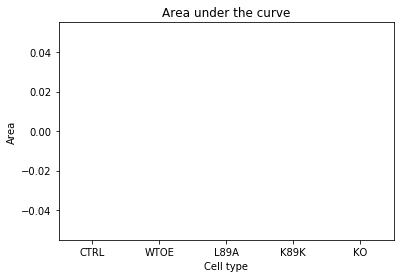

In [8]:
ax2 = sns.barplot(x = 'Cell type', data=area, y="Area", ci=95,  order = ["CTRL", "WTOE", "L89A",'K89K', "KO"]).set_title('Area under the curve')
